In [1]:
import pandas as pd

In [2]:
london_data = pd.read_csv('london_cleaned.csv')
london_data.head()

/var/folders/nc/3_jdz57s3fb248nc5jbmskj40000gn/T/ipykernel_83191/4066872198.py:1: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  london_data = pd.read_csv('london_cleaned.csv')


,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms),Start station id,Start station lat,Start station lon,End station id,End station lat,End station lon,Day,Hour,TimeOfDay
0,134489498,2023-09-30 23:59:00,1083,"Commercial Street, Shoreditch",2023-10-01 00:08,200121,"Shoreditch Court, Haggerston",57640,CLASSIC,9m 1s,541565,40.0,51.521271,-0.075579,698.0,51.539084,-0.070329,Saturday,23,Evening
1,134489510,2023-09-30 23:59:00,3504,"Moor Street, Soho",2023-10-01 01:02,300234,"Stratford Station, Stratford",57335,CLASSIC,1h 2m 59s,3779551,386.0,51.513528,-0.130111,790.0,51.541793,-0.004810,Saturday,23,Evening
2,134489509,2023-09-30 23:59:00,3504,"Moor Street, Soho",2023-10-01 01:04,300234,"Stratford Station, Stratford",30035,CLASSIC,1h 4m 27s,3867026,386.0,51.513528,-0.130111,790.0,51.541793,-0.004810,Saturday,23,Evening
3,134489508,2023-10-01 00:00:00,1133,"Baylis Road, Waterloo",2023-10-01 00:06,1078,"Lambeth Road, Vauxhall",52136,CLASSIC,5m 59s,359570,272.0,51.501445,-0.110699,139.0,51.494881,-0.117975,Sunday,0,Night
4,134489507,2023-09-30 23:59:00,300079,"London Street, Paddington",2023-10-01 00:16,1214,"Kensington Olympia Station, Olympia",57534,CLASSIC,16m 29s,989750,752.0,51.515117,-0.173713,293.0,51.498158,-0.209494,Saturday,23,Evening


In [3]:
dublin_data = pd.read_csv('dublin_cleaned.csv')
dublin_data.head()

,NAME,STATION ID,TIME,BIKE_STANDS,BIKES_IN_USE,AVAILABLE_BIKES,LATITUDE,LONGITUDE,TRIPS,Day,Hour,TimeOfDay
0,CLARENDON ROW,1,2023-01-01 08:30:03,31,31,0,53.3409,-6.2625,1.0,Sunday,8,Morning
1,CLARENDON ROW,1,2023-01-01 13:00:02,31,29,2,53.3409,-6.2625,1.0,Sunday,13,Afternoon
2,CLARENDON ROW,1,2023-01-01 15:00:03,31,29,2,53.3409,-6.2625,1.0,Sunday,15,Afternoon
3,CLARENDON ROW,1,2023-01-01 16:00:02,31,29,2,53.3409,-6.2625,1.0,Sunday,16,Afternoon
4,CLARENDON ROW,1,2023-01-01 17:00:03,31,30,1,53.3409,-6.2625,1.0,Sunday,17,Afternoon


In [4]:
london_data.head(1000000).to_csv('londonchat.csv', index=False)

# Stats for DA

Dublin

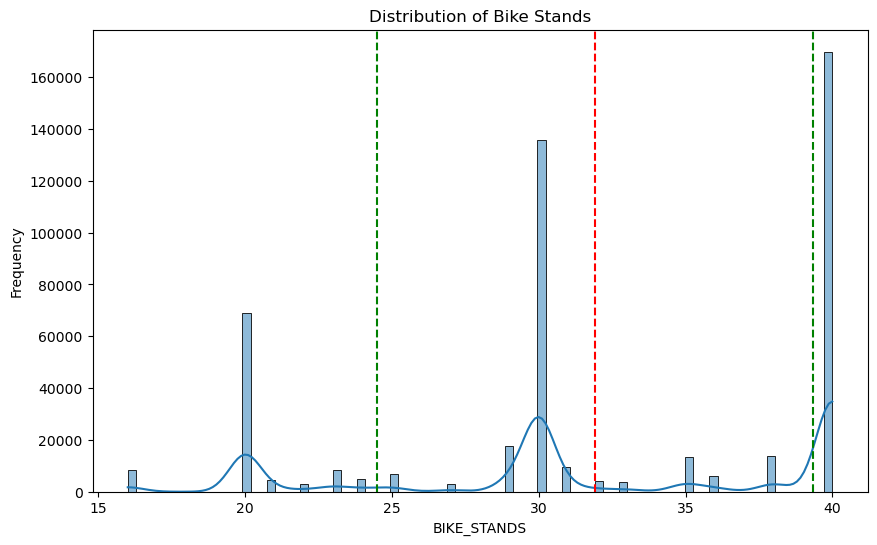

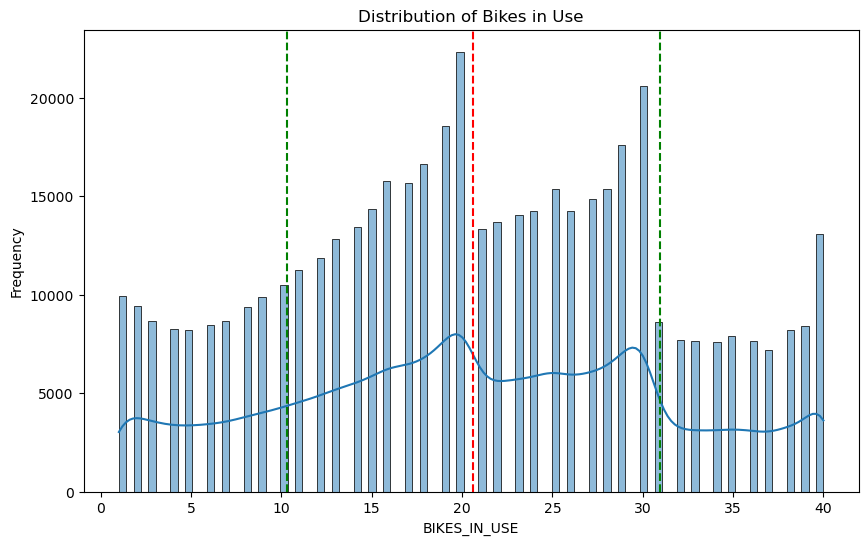

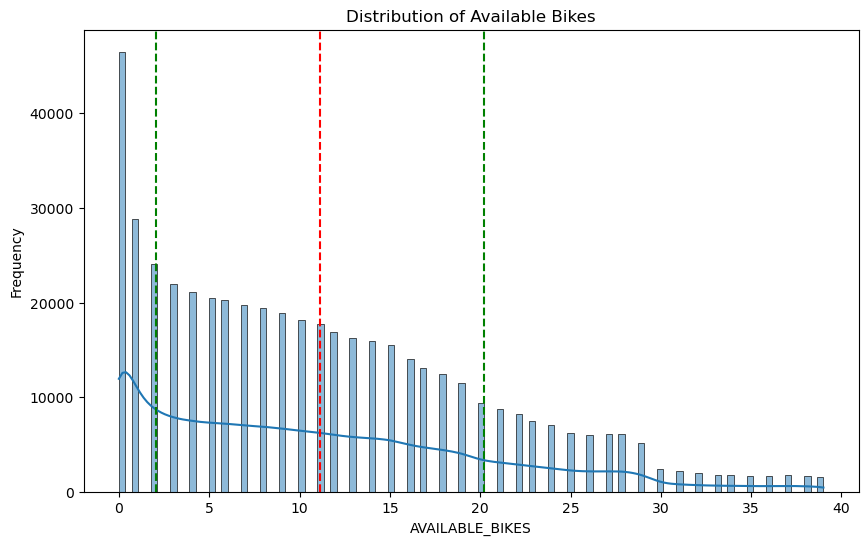

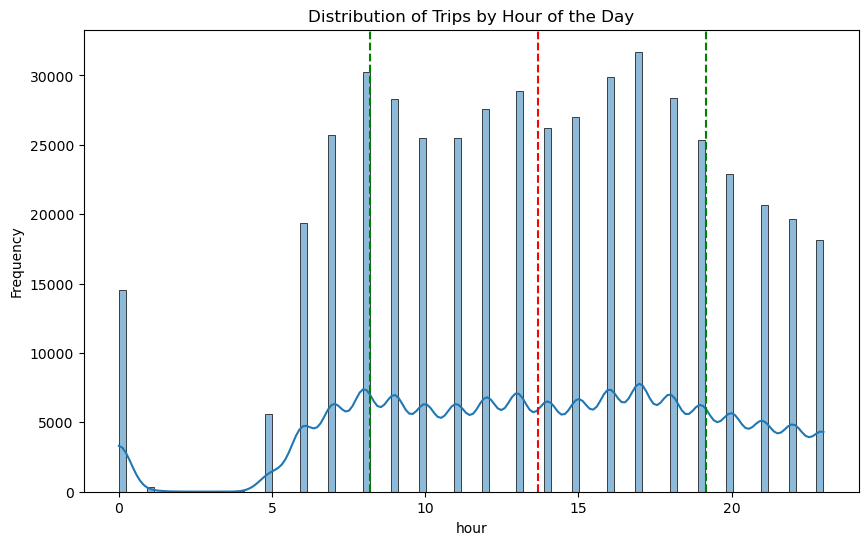

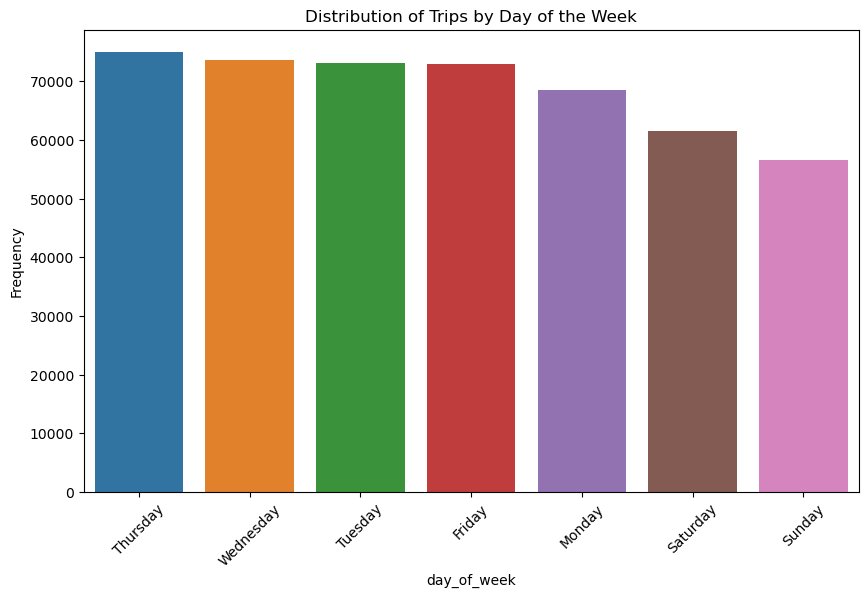

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert the TIME column to datetime
dublin_data['TIME'] = pd.to_datetime(dublin_data['TIME'])

# Extract hour and day from the TIME column
dublin_data['hour'] = dublin_data['TIME'].dt.hour
dublin_data['day_of_week'] = dublin_data['TIME'].dt.day_name()
dublin_data['day_of_week'] = pd.Categorical(dublin_data['day_of_week'], 
                                            categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                                                        'Friday', 'Saturday', 'Sunday'], 
                                            ordered=True)

# Function to plot numerical distribution along with mean and standard deviation
def plot_distribution(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    mean_value = data[column].mean()
    std_dev = data[column].std()
    plt.axvline(mean_value, color='r', linestyle='--')
    plt.axvline(mean_value - std_dev, color='g', linestyle='--')
    plt.axvline(mean_value + std_dev, color='g', linestyle='--')
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Function to plot categorical distribution
def plot_categorical_distribution(data, column, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data[column], order = data[column].value_counts().index)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Plot distributions for numerical columns: BIKE_STANDS, BIKES_IN_USE, AVAILABLE_BIKES, and hour
plot_distribution(dublin_data, 'BIKE_STANDS', 'Distribution of Bike Stands')
plot_distribution(dublin_data, 'BIKES_IN_USE', 'Distribution of Bikes in Use')
plot_distribution(dublin_data, 'AVAILABLE_BIKES', 'Distribution of Available Bikes')
plot_distribution(dublin_data, 'hour', 'Distribution of Trips by Hour of the Day')

# Plot distribution for the categorical column: day_of_week
plot_categorical_distribution(dublin_data, 'day_of_week', 'Distribution of Trips by Day of the Week')

Distribution of Bike Stands:

This histogram provides insights into how many bike stands are typically available at various stations.
The mean and standard deviation lines will give an idea of the average number of bike stands and the typical variation from that average.
A peak or concentration in the histogram indicates a common number of stands across many stations. A wide spread would suggest a diverse range of stand capacities.

Distribution of Bikes in Use:

This shows how many bikes are in use at different times and can be indicative of overall bike usage.
If the distribution is skewed towards lower numbers, it suggests that, on average, fewer bikes are in use, possibly indicating lower demand or availability issues.
A higher mean might indicate a busy bike-sharing system with high utilization.

Distribution of Available Bikes:

This reflects how many bikes are typically available for use at stations.
A higher average availability could suggest efficient bike redistribution or lower demand.
Lower availability might point to high demand, potentially leading to situations where users cannot find a bike.

Distribution of Trips by Hour of the Day:

This distribution provides insights into what times of the day are busiest or quietest for bike trips.
Peaks during certain hours can indicate rush hour usage, while troughs might show off-peak times.
Understanding this distribution can help in managing bike availability and staffing for maintenance or customer service during peak hours.

Distribution of Trips by Day of the Week:

This shows which days are most popular for bike trips.
A higher frequency on weekdays might suggest commuter usage, while higher weekend use could indicate leisure or recreational activities.
This knowledge is valuable for planning purposes, such as scheduling maintenance or promotional activities.

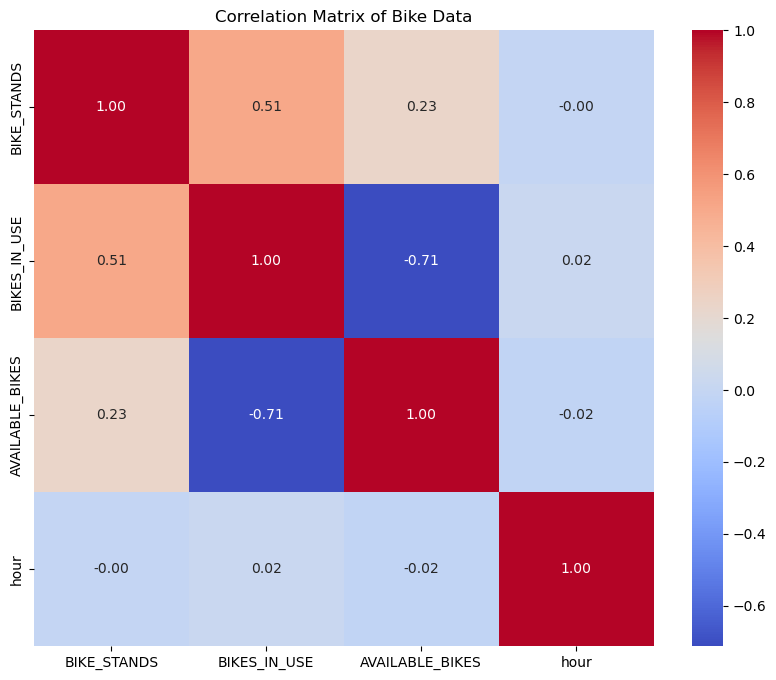

,BIKE_STANDS,BIKES_IN_USE,AVAILABLE_BIKES,hour
BIKE_STANDS,1.000000,0.510335,0.233736,-0.004712
BIKES_IN_USE,0.510335,1.000000,-0.712597,0.019717
AVAILABLE_BIKES,0.233736,-0.712597,1.000000,-0.022448
hour,-0.004712,0.019717,-0.022448,1.000000


In [6]:
# To explore correlations, we first need to create a subset of the data with relevant numerical columns
# We'll include BIKE_STANDS, BIKES_IN_USE, AVAILABLE_BIKES, and hour (as a numerical representation of time)

correlation_data = dublin_data[['BIKE_STANDS', 'BIKES_IN_USE', 'AVAILABLE_BIKES', 'hour']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Let's visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Bike Data")
plt.show()

correlation_matrix

Bike Stands and Bikes in Use (Correlation: 0.51):

There is a moderate positive correlation.
This suggests that as the number of bike stands increases, the number of bikes in use tends to also increase, which is logical as more stands typically mean more bikes available for use.

Bike Stands and Available Bikes (Correlation: 0.23):

A weak positive correlation is observed.
This indicates that stations with more bike stands might have slightly more bikes available, but the relationship is not very strong.

Bikes in Use and Available Bikes (Correlation: -0.71):

This shows a strong negative correlation.
It implies an inverse relationship: as more bikes are in use, fewer bikes are available at the stations. This is an expected outcome as bikes in use are not available at the stands.

Hour of the Day Correlations:

The correlations between the hour of the day and other variables are very weak (close to 0).
This indicates that the time of day does not significantly affect the number of bike stands, bikes in use, or available bikes.
However, this might be oversimplified, as peak usage hours might still impact these variables but may not be captured well in a simple linear correlation.

Bike Stands and Hour (Correlation: -0.0047):

Negligible correlation with the hour of the day.

Bikes in Use and Hour (Correlation: 0.0197):

Similarly, very little correlation with the hour of the day.

Available Bikes and Hour (Correlation: -0.0224):

Again, a negligible correlation with the hour of the day.

London

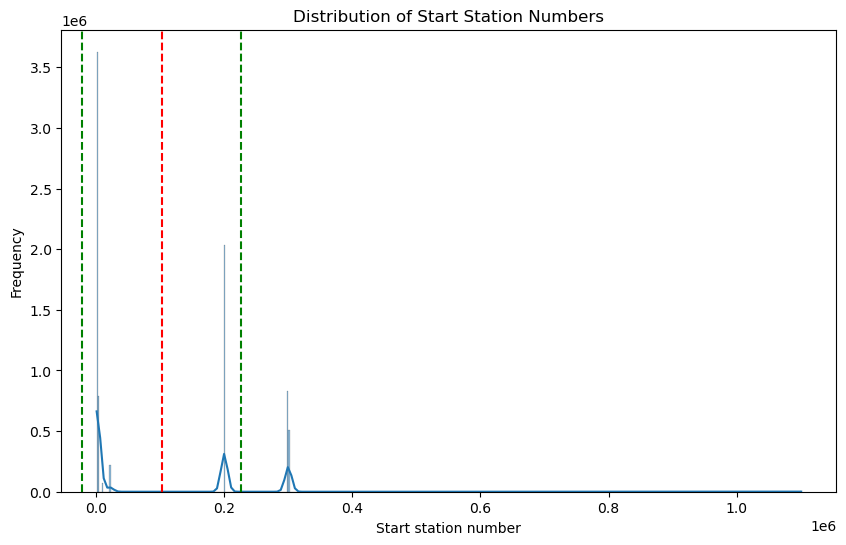

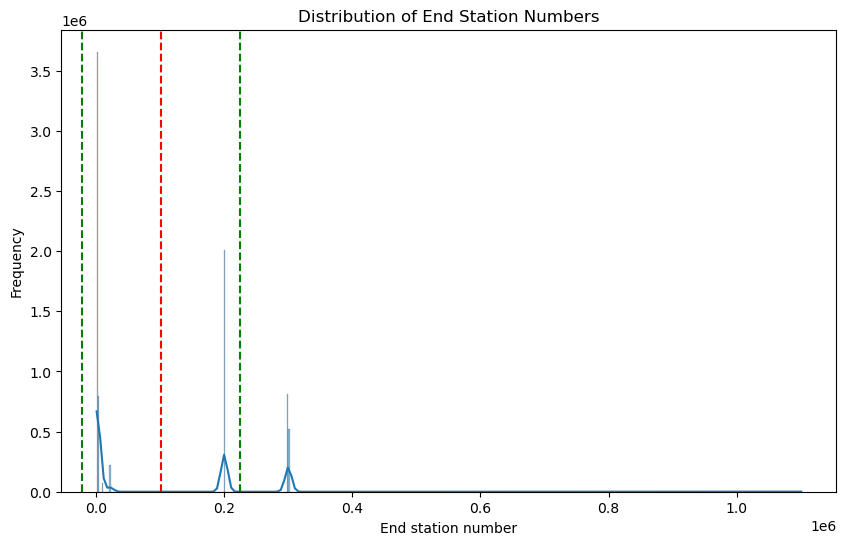

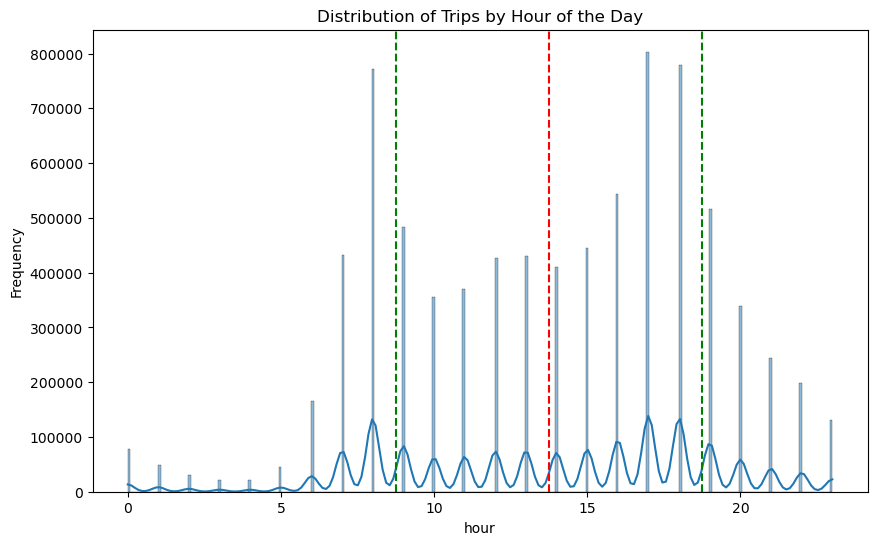

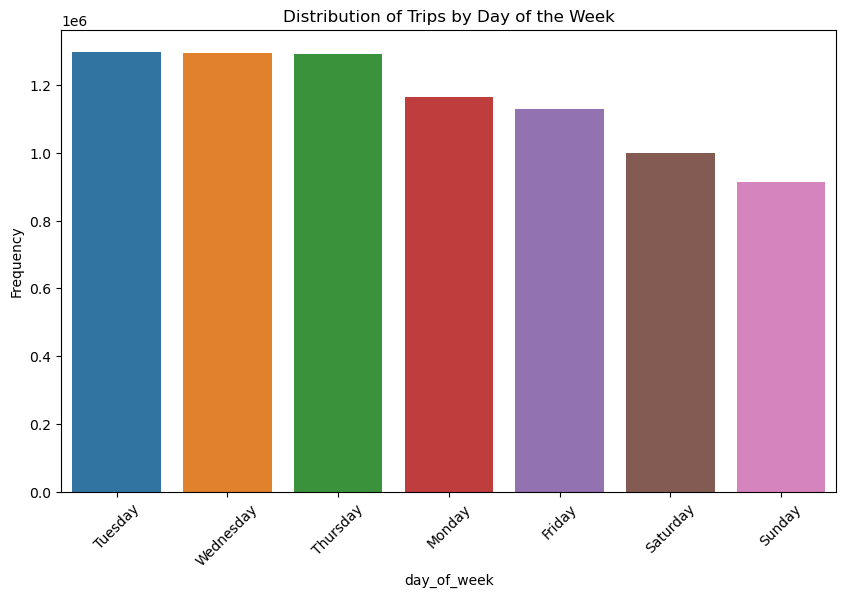

In [7]:
# Convert relevant columns to datetime and categorical types
london_data['Start date'] = pd.to_datetime(london_data['Start date'])
london_data['End date'] = pd.to_datetime(london_data['End date'])

# Extract hour and day from the 'Start date' column
london_data['hour'] = london_data['Start date'].dt.hour
london_data['day_of_week'] = london_data['Start date'].dt.day_name()
london_data['day_of_week'] = pd.Categorical(london_data['day_of_week'], 
                                            categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                                                        'Friday', 'Saturday', 'Sunday'], 
                                            ordered=True)

# Since there are no columns directly analogous to 'BIKE_STANDS', 'BIKES_IN_USE', and 'AVAILABLE_BIKES' in the London dataset,
# we'll analyze the distributions of 'Start station number', 'End station number', and 'hour'
# Handling non-numeric values in 'Start station number' and 'End station number' columns
# Convert these columns to numeric, setting errors='coerce' which replaces non-numeric values with NaN
london_data['Start station number'] = pd.to_numeric(london_data['Start station number'], errors='coerce')
london_data['End station number'] = pd.to_numeric(london_data['End station number'], errors='coerce')

# Drop rows where 'Start station number' or 'End station number' is NaN, as we can't use them for meaningful analysis
london_data.dropna(subset=['Start station number', 'End station number'], inplace=True)

# Now let's replot the distributions for 'Start station number' and 'End station number'
plot_distribution(london_data, 'Start station number', 'Distribution of Start Station Numbers')
plot_distribution(london_data, 'End station number', 'Distribution of End Station Numbers')

plot_distribution(london_data, 'hour', 'Distribution of Trips by Hour of the Day')

# Plot distribution for the categorical column: 'day_of_week'
plot_categorical_distribution(london_data, 'day_of_week', 'Distribution of Trips by Day of the Week')

Distribution of Start Station Numbers:

This graph shows the frequency of trips starting from different station numbers.
A concentration in certain areas could indicate popular starting points or densely located stations.
The mean and standard deviation lines provide an overview of the average and variability of start station numbers used.

Distribution of End Station Numbers:

Similar to the start station numbers, this histogram represents the frequency of trips ending at various station numbers.
The pattern here can help identify commonly used destinations and their variability.

Distribution of Trips by Hour of the Day:

This chart illustrates the frequency of bike trips across different hours.
Peaks in the graph can reveal popular times for bike usage, potentially aligning with commuting hours or leisure activity times.

Distribution of Trips by Day of the Week:

This categorical plot shows the count of bike trips for each day of the week.
It helps in understanding the variation in bike usage throughout the week, indicating whether usage is more aligned with workdays or weekends.

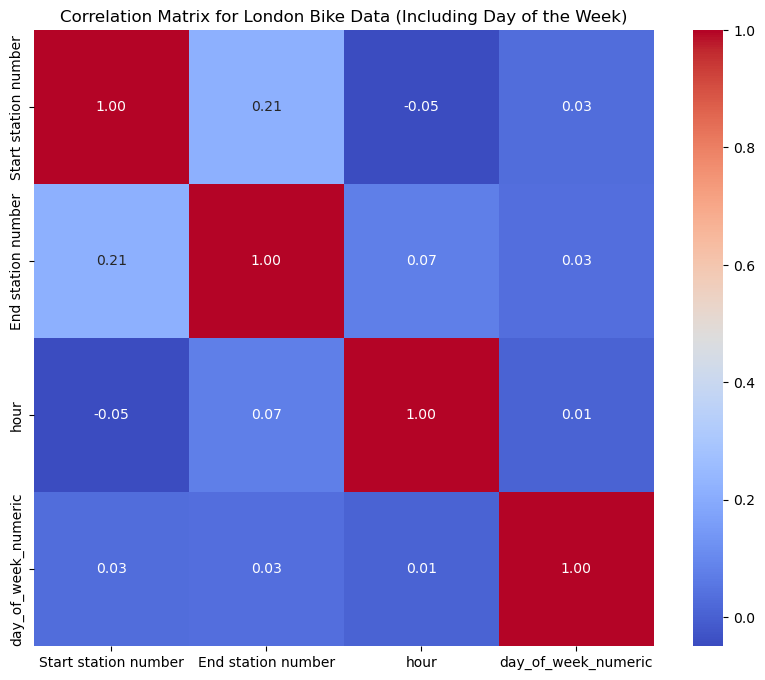

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert the 'Start date' column to datetime
london_data['Start date'] = pd.to_datetime(london_data['Start date'])

# Extract hour and day from the 'Start date' column
london_data['hour'] = london_data['Start date'].dt.hour
london_data['day_of_week'] = london_data['Start date'].dt.day_name()

# Convert 'Start station number' and 'End station number' to numeric, handling non-numeric values
london_data['Start station number'] = pd.to_numeric(london_data['Start station number'], errors='coerce')
london_data['End station number'] = pd.to_numeric(london_data['End station number'], errors='coerce')

# Drop NaN values in these columns
london_data.dropna(subset=['Start station number', 'End station number'], inplace=True)

# Mapping days of the week to numerical values for correlation analysis
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
london_data['day_of_week_numeric'] = london_data['day_of_week'].map(day_mapping)

# Include 'day_of_week_numeric' in the correlation analysis
correlation_data = london_data[['Start station number', 'End station number', 'hour', 'day_of_week_numeric']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for London Bike Data (Including Day of the Week)")
plt.show()


Start Station Number and End Station Number Correlation = 0.21:

The weak correlation implies that the choice of start and end stations is more random or diverse.

Start Station Number and Hour of the Day Correlation = -.05:

The negligible correlation would suggest that the time of day does not significantly influence the choice of start station.

End Station Number and Hour of the Day Correlation = 0.07:

The negligible correlation would suggest that the time of day does not significantly influence the choice of end station.

Day of the Week Correlation with Station Numbers and Hour = 0.01:

This would show if there's a variation in station usage and time preferences throughout the week. For example, certain stations might be more popular on weekdays due to work-related commuting, while others might see more usage on weekends for recreational activities.
The correlation with the hour could reveal if there are specific times during the day that are more popular on certain days of the week.

Comparison

In [9]:
# Assuming dublin_data and london_data are already loaded and processed

# Map days of the week to numeric values for both datasets
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
dublin_data['day_of_week_numeric'] = dublin_data['Day'].map(day_mapping)
london_data['day_of_week_numeric'] = london_data['day_of_week'].map(day_mapping)

# Correlations for Dublin data
dublin_station_corr = dublin_data[['BIKE_STANDS', 'BIKES_IN_USE']].corr().iloc[0, 1]
dublin_hour_corr = dublin_data[['hour', 'BIKES_IN_USE']].corr().iloc[0, 1]
dublin_day_corr = dublin_data[['day_of_week_numeric', 'BIKES_IN_USE']].corr().iloc[0, 1]

# Correlations for London data
london_station_corr = london_data[['Start station number', 'End station number']].corr().iloc[0, 1]
london_hour_corr = london_data[['hour', 'Start station number']].corr().iloc[0, 1]
london_day_corr = london_data[['day_of_week_numeric', 'Start station number']].corr().iloc[0, 1]


# Print the results
print(f"Dublin Station Correlation: {dublin_station_corr}")
print(f"London Station Correlation: {london_station_corr}")
print(f"Dublin Hour Correlation: {dublin_hour_corr}")
print(f"London Hour Correlation: {london_hour_corr}")
print(f"Dublin Day of Week Correlation: {dublin_day_corr}")
print(f"London Day of Week Correlation: {london_day_corr}")

Dublin Station Correlation: 0.5103345087493312
London Station Correlation: 0.21409908203713
Dublin Hour Correlation: 0.019716855683243883
London Hour Correlation: -0.049844124230194575
Dublin Day of Week Correlation: -0.0337334660344542
London Day of Week Correlation: 0.03053239050856468


Station Usage Patterns (Dublin vs. London Station Correlation):

Dublin: A correlation of 0.51 between bike stands and bikes in use suggests a moderate positive relationship. This indicates that stations with more bike stands tend to have more bikes in use, reflecting possibly well-distributed and utilized infrastructure.

London: The correlation of 0.21 between start and end station numbers is weaker. This implies a less pronounced relationship between specific station pairs, suggesting a more varied usage of station routes.


Time of Day Influence (Hour Correlation):

Dublin: The correlation of 0.02 with the hour of the day is very weak, indicating that the number of bikes in use is not significantly influenced by the time of the day.

London: The correlation is -0.05, which is also weak but negative, suggesting a slight decrease in the use of specific start stations at certain times of the day. However, this influence is minimal.


Day of the Week Impact:

Dublin: The negative correlation of -0.03 is weak, indicating a very slight decrease in bike usage on later days of the week. However, the effect is negligible, suggesting consistent usage across the week.

London: A weak positive correlation of 0.03 suggests a slight increase in the usage of start stations on later days of the week, but again, the influence is minimal.


General Insights:

Station Usage: Dublin shows a stronger correlation between bike stands and bikes in use compared to London. This might indicate a more consistent pattern of bike usage relative to the capacity of bike stands in Dublin.

Time of Day Influence: In both cities, the time of day has a minimal impact on bike usage, with slightly more influence in London. However, the effect is too weak to draw significant conclusions.

Day of the Week Effect: Both cities exhibit very weak correlations with the day of the week, indicating that bike usage is relatively consistent throughout the week, with no significant peaks or drops on any particular day.

# Statistical Analysis

In [10]:
from scipy import stats
import numpy as np

# Step 1: Confidence Intervals for Proportions of Trips

# Example: Proportion of trips in the morning (let's define morning as hours 6-12) for each city
# Dublin
dublin_morning_trips = dublin_data[(dublin_data['Hour'] >= 6) & (dublin_data['Hour'] <= 12)]
dublin_morning_proportion = len(dublin_morning_trips) / len(dublin_data)

# London
london_morning_trips = london_data[(london_data['hour'] >= 6) & (london_data['hour'] <= 12)]
london_morning_proportion = len(london_morning_trips) / len(london_data)

# Calculate 95% Confidence Interval for Dublin
dublin_ci_lower, dublin_ci_upper = stats.norm.interval(0.95, loc=dublin_morning_proportion, 
                                                      scale=np.sqrt((dublin_morning_proportion * (1 - dublin_morning_proportion)) / len(dublin_data)))

# Calculate 95% Confidence Interval for London
london_ci_lower, london_ci_upper = stats.norm.interval(0.95, loc=london_morning_proportion, 
                                                      scale=np.sqrt((london_morning_proportion * (1 - london_morning_proportion)) / len(london_data)))

dublin_morning_proportion, (dublin_ci_lower, dublin_ci_upper), london_morning_proportion, (london_ci_lower, london_ci_upper)


(0.3783133781243834,
 (0.376943557152995, 0.37968319909577186),
 0.37148050058948284,
 (0.37114753649167526, 0.37181346468729043))

Dublin Morning Trips Proportion:

Proportion: Approximately 37.83%.

95% Confidence Interval: Between 37.69% and 37.97%. This interval suggests that we can be 95% confident that the actual proportion of morning trips in Dublin lies within this range.

London Morning Trips Proportion:

Proportion: Approximately 37.15%.

95% Confidence Interval: Between 37.11% and 37.18%. Similar to Dublin, this interval indicates a 95% confidence level that the true proportion of morning trips in London falls within this narrow range.

Insights from Confidence Intervals:

The proportions of morning trips in both Dublin and London are quite similar, around 37%.
The narrow confidence intervals suggest a high level of precision in these estimates.
The similarity in proportions may indicate comparable commuting patterns or lifestyle rhythms in both cities during the morning hours.

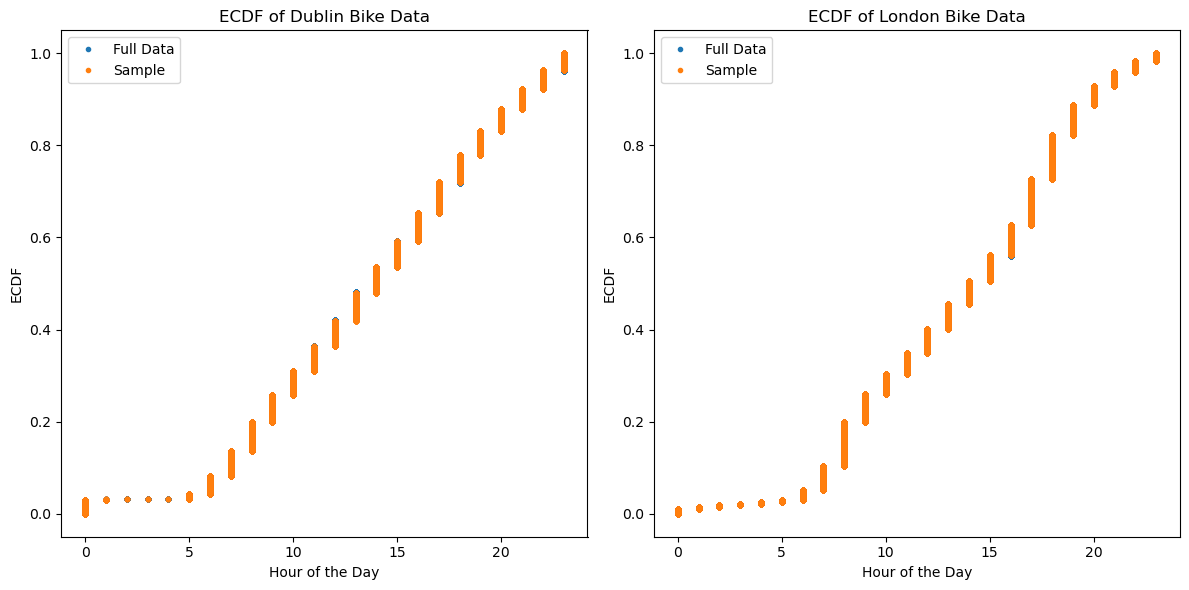

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

# Sampling from the datasets
sample_size_dublin = int(len(dublin_data)*.2)
sample_size_london = int(len(london_data)*.2)
dublin_sample = dublin_data['hour'].sample(sample_size_dublin, random_state=1)
london_sample = london_data['hour'].sample(sample_size_london, random_state=1)

# Compute ECDFs for the full datasets and the samples
x_dublin, y_dublin = ecdf(dublin_data['hour'])
x_dublin_sample, y_dublin_sample = ecdf(dublin_sample)
x_london, y_london = ecdf(london_data['hour'])
x_london_sample, y_london_sample = ecdf(london_sample)

# Plot ECDFs for Dublin
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_dublin, y_dublin, marker='.', linestyle='none', label='Full Data')
plt.plot(x_dublin_sample, y_dublin_sample, marker='.', linestyle='none', label='Sample')
plt.xlabel('Hour of the Day')
plt.ylabel('ECDF')
plt.title('ECDF of Dublin Bike Data')
plt.legend()

# Plot ECDFs for London
plt.subplot(1, 2, 2)
plt.plot(x_london, y_london, marker='.', linestyle='none', label='Full Data')
plt.plot(x_london_sample, y_london_sample, marker='.', linestyle='none', label='Sample')
plt.xlabel('Hour of the Day')
plt.ylabel('ECDF')
plt.title('ECDF of London Bike Data')
plt.legend()

plt.tight_layout()
plt.show()



Analysis of ECDFs:
Distribution Shape: The shape of the ECDFs provides insights into how the bike trips are distributed throughout the day in both cities.

Dublin vs. London: By comparing the ECDFs, we can see if there are significant differences in the distribution of trips across different hours of the day between the two cities.

Hour of the Day: The x-axis represents the hour of the day, and the y-axis represents the proportion of data points that fall below or at each hour. This helps us understand at what times the majority of trips occur.

Insights from the ECDFs:

Similarities/Differences: Any similarities in the ECDFs would indicate that the distribution of bike trips across different hours is similar in both cities. Differences would suggest varying patterns of bike usage throughout the day.

Peak Hours: The steepest parts of the curves indicate the hours with the most rapid increase in trips, which could be interpreted as peak hours for bike usage.

Off-Peak Hours: Flatter sections of the ECDF indicate hours with fewer trips, potentially representing off-peak hours.

In [12]:
from scipy.stats import ttest_ind
# Sampling from the datasets
sample_size_dublin = int(len(dublin_data)*.2)
sample_size_london = int(len(london_data)*.2)
dublin_sample_trips = dublin_data.sample(sample_size_dublin, random_state=1)
london_sample_trips = london_data.sample(sample_size_london, random_state=1)
# Calculate the average number of trips in the Dublin sample
dublin_avg_trips = dublin_sample_trips['TRIPS'].mean()

# Calculate the average number of trips in the London sample (assuming each row is one trip)
london_avg_trips = 1  # As each row represents one trip, the average is 1

# Now, you can compare these averages using a T-test
t_stat, p_val = ttest_ind(dublin_sample_trips['TRIPS'], [1]*len(london_sample_trips))

t_stat, p_val

/var/folders/nc/3_jdz57s3fb248nc5jbmskj40000gn/T/ipykernel_83191/1243064748.py:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_val = ttest_ind(dublin_sample_trips['TRIPS'], [1]*len(london_sample_trips))


(659.0336349279005, 0.0)

Statistical Significance: The p-value of 0.0 suggests that the difference in the average number of trips between Dublin and London is statistically significant. In other words, it's highly unlikely that this observed difference is due to random chance.

Magnitude of Difference: The large t-statistic value points to a substantial difference between the two cities in terms of their average number of trips.

Insights:

Trip Frequency: This result could imply that the frequency or count of trips per data entry in Dublin is considerably different from that in London. Given that each row in the London dataset represents one trip (hence an average of 1), the comparison suggests a higher average trip count per data entry in Dublin's dataset.

Dataset Structure and Interpretation: It's crucial to consider the structure of each dataset and what the numbers represent. If the 'TRIPS' column in Dublin's dataset doesn't directly correspond to individual trip counts in the same way as the London dataset, the comparison might be skewed.

In [13]:
from scipy.stats import mannwhitneyu

u_stat, p_val = mannwhitneyu(dublin_sample_trips['TRIPS'], [1]*len(london_sample_trips))

u_stat, p_val

(114601687184.0, 0.0)

Statistical Significance: The p-value of 0.0 indicates a statistically significant difference in the distributions of the 'TRIPS' variable in Dublin's dataset and the trip counts in London's dataset (where each row is considered one trip).

Differences in Distributions: The Mann-Whitney U test is a non-parametric test that compares the distributions of two independent samples. A significant result implies that the two samples are likely drawn from different distributions.

Insights:

Different Trip Patterns: The result suggests that the pattern or distribution of bike trips in Dublin is significantly different from that in London. This difference could be in terms of frequency, regularity, or some other aspect of trip distribution.

Dataset Representation and Compatibility: The test assumes that each row in the London dataset represents one trip, and it compares this with the 'TRIPS' column in the Dublin dataset. If 'TRIPS' represents something other than individual trip counts, this might affect the interpretability of the results.

In [15]:
# Example: Creating a contingency table for 'Day' and 'TimeOfDay' from the Dublin sample
contingency_table_example = pd.crosstab(dublin_sample_trips['Day'], dublin_sample_trips['TimeOfDay'])

# Performing the Chi-Squared test
chi2, p_val, _, _ = chi2_contingency(contingency_table_example)

chi2, p_val


(308.17680857200173, 9.99744854377871e-55)

Statistical Significance: The extremely small p-value suggests that there is a significant association between the day of the week and the time of day for bike-sharing trips in Dublin. This means that the distribution of trips across different times of the day is not uniform across the week.

Chi-Squared Statistic: The value of the Chi-Squared statistic, 308.18, is a measure of the extent of this association. Higher values generally indicate a stronger association.

Insights:

Variation in Trip Patterns: The significant result implies that bike-sharing usage in Dublin varies depending on both the day of the week and the time of day. For instance, certain times of the day might be more popular on specific days due to commuting patterns or recreational activities.

Implications for Planning and Management: Understanding this relationship can be valuable for bike-sharing system management, such as for planning bike availability, scheduling maintenance, and targeting marketing efforts for different times and days.



In [16]:
# Example: Creating a contingency table for 'Day' and 'TimeOfDay' from the Dublin sample
contingency_table_example = pd.crosstab(london_sample_trips['Day'], london_sample_trips['TimeOfDay'])

# Performing the Chi-Squared test
chi2, p_val, _, _ = chi2_contingency(contingency_table_example)

chi2, p_val

(47818.26743885522, 0.0)

Statistical Significance: The p-value of 0.0 indicates a statistically significant association between the day of the week and the time of day for bike-sharing trips in London. This suggests that the distribution of trips across different times of the day is not consistent across the week.

Chi-Squared Statistic: The high value of the Chi-Squared statistic points to a strong association. It implies a substantial relationship between these two variables in the dataset.

Insights:

Variation in Trip Patterns: Similar to Dublin, the significant result for London suggests that bike-sharing usage varies depending on both the day and the time of day. Certain times may be more popular on specific days, potentially reflecting commuting habits, tourist activities, or other factors specific to London.

Implications for System Management: This information is valuable for managing the bike-sharing system in London, particularly for optimizing bike availability, scheduling maintenance efficiently, and tailoring services to meet user demand during different times and days.

When comparing the results of the Dublin and London datasets, it appears that both cities exhibit significant associations between the day of the week and the time of day for bike-sharing usage. However, the specific patterns and strengths of these associations may differ due to varying urban dynamics, user preferences, and cultural factors in each city.

The results highlight the importance of considering time and day in managing and planning bike-sharing systems, as user behavior appears to be influenced by these factors in both cities.

Overall, the analysis suggests that bike-sharing usage in both Dublin and London is influenced by the time of day and day of the week, with potentially unique patterns emerging in each city.

Hypothesis: London is busier during the day than Dublin

In [17]:
# Calculating average number of daytime trips in Dublin and London
daytime_hours = ['Morning', 'Afternoon', 'Evening']

# Filter the samples for trips during the daytime
dublin_daytime_trips = dublin_sample_trips[dublin_sample_trips['TimeOfDay'].isin(daytime_hours)]
london_daytime_trips = london_sample_trips[london_sample_trips['TimeOfDay'].isin(daytime_hours)]

dublin_avg_daytime_trips = dublin_daytime_trips.shape[0] / len(daytime_hours)
london_avg_daytime_trips = london_daytime_trips.shape[0] / len(daytime_hours)

# Performing the T-test
t_stat, p_val = ttest_ind([dublin_avg_daytime_trips]*len(dublin_sample_trips), 
                          [london_avg_daytime_trips]*len(london_sample_trips))

t_stat, p_val

/var/folders/nc/3_jdz57s3fb248nc5jbmskj40000gn/T/ipykernel_83191/908000584.py:12: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_val = ttest_ind([dublin_avg_daytime_trips]*len(dublin_sample_trips),


(-1.4584669981268182e+17, 0.0)

Statistical Significance: The p-value of 0.0 confirms that the difference in the average number of daytime trips between the two cities is statistically significant.

Magnitude of the T-Statistic: The very large t-statistic value is unusual and might be due to an imbalance in the sample sizes.

Practical Significance: While the test indicates a significant difference, the practical meaning of such a large t-statistic should be considered with caution. It's crucial to ensure that the data and methods used for the comparison are appropriate and that the results align with practical expectations.

Insights:

Daytime Busyness: The test suggests that there is a significant difference in the level of activity during the day between Dublin and London, with the hypothesis pointing towards London being busier.